<a href="https://colab.research.google.com/github/darkginka/Diet-Recommanded-System/blob/main/PandasDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Start**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

In [80]:
####### dataset #######
food_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/food_nutrition.csv")
disease_nutrition = pd.read_csv("/content/drive/MyDrive/dataset/disease_nutrition.csv",encoding='unicode_escape')

In [ ]:
#food_nutrition.info()
# for col in food_nutrition.columns:
#     print(col)
# food_nutrition.head()
x = food_nutrition.Genres
print(x)


In [ ]:
# disease_nutrition.info()
disease_nutrition.head()

**Part-1**

In [93]:
####### Methods #######
def get_disease(disease_name):
	if(disease_name not in list(disease_nutrition["disease"])):
		return False
	else:
		return disease_nutrition[disease_nutrition.disease==disease_name]["disease"].values[0]

def get_disease_name(disease_id):
	return disease_nutrition[disease_nutrition.disease_id == disease_id]["disease"].values[0]

def get_disease_id(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["disease_id"].values[0]

def get_disease_ie(disease):
	return disease_nutrition[disease_nutrition.disease == disease]["ineficient_nutritions"].values[0]

In [ ]:
####### get-set Data #######
users_disease = input("Enter Disease Name: ")
disease_name = get_disease(users_disease)
if(disease_name==False):
  print("Disease Not Found")
else:
  disease_id = get_disease_id(disease_name)
  i= disease_id-101
  print(disease_nutrition.iloc[i])         
  disease_ie = get_disease_ie(disease_name)
#Convert disease-nutritions column value into list
  dis_list = list(disease_ie.split(" "))
#Convert food column into list
  col_list = food_nutrition.columns.values.tolist()

**Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variable to X
X = food_nutrition.drop(["Category", "Description", "Sodium" ,"Zinc"],axis=1)
# Putting response variable to y
y = food_nutrition[["Sodium" ,"Zinc"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((4683, 33), (2008, 33))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [ ]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

In [ ]:
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [ ]:
dot_data = StringIO()  
export_graphviz(dt, out_file=dot_data, filled=True,
                feature_names=X.columns, 
                class_names=['Not Eat', "Eat"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

**KMeans**

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pickle

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(food_nutrition[['Potassium','Protein']])

print(kmeans.labels_)

# predicted_class = kmeans.predict([[1, 10, 15]])
# print(predicted_class)

centroids = kmeans.cluster_centers_
print(centroids)
plt.scatter(food_nutrition['Potassium'], food_nutrition['Protein'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

 **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [ ]:
X, y = make_classification(n_samples=1000, n_features=4,
                           n_informative=2, n_redundant=0,
                           random_state=0, shuffle=False)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0]]))

 **Chart Pie**

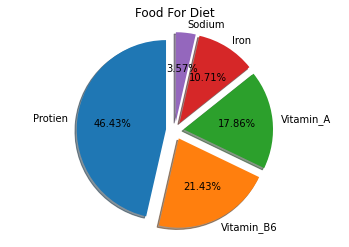

In [ ]:
labels= ['Protien', 'Vitamin_B6', 'Vitamin_A', 'Iron','Sodium']
#print(type(labels))
sizes= [1300, 600, 500, 300,100]
plt.pie(sizes,labels=labels, startangle=90, shadow=True,explode=(0.1, 0.1, 0.1, 0.1,0.1), autopct='%1.2f%%')
plt.title('Food For Diet')
plt.axis('equal')
plt.show()

**Bar Chart**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  


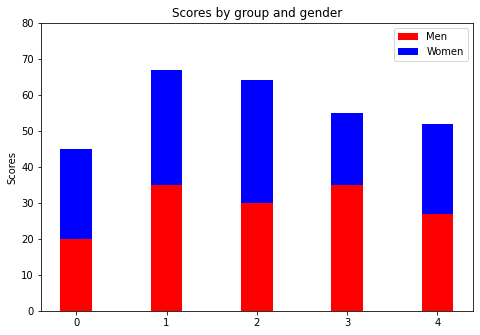

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
ind = np.arange(N) # the x locations for the groups
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(ind, menMeans, width, color='r')
ax.bar(ind, womenMeans, width,bottom=menMeans, color='b')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
ax.set_yticks(np.arange(0, 81, 10))
ax.legend(labels=['Men', 'Women'])
plt.show()

**Horizonatal Bar**

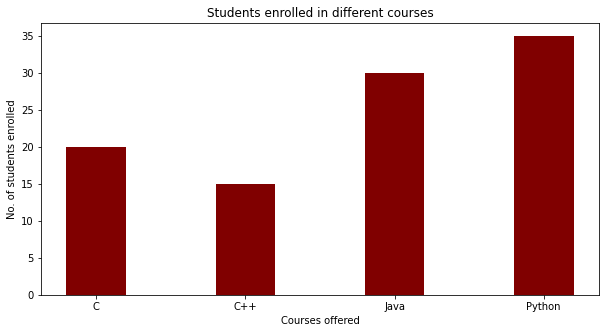

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# creating the dataset
data = {'C':20, 'C++':15, 'Java':30,
		'Python':35}
courses = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='maroon',
		width = 0.4)

plt.xlabel("Courses offered")
plt.ylabel("No. of students enrolled")
plt.title("Students enrolled in different courses")
plt.show()

**Vertial** **Bar**

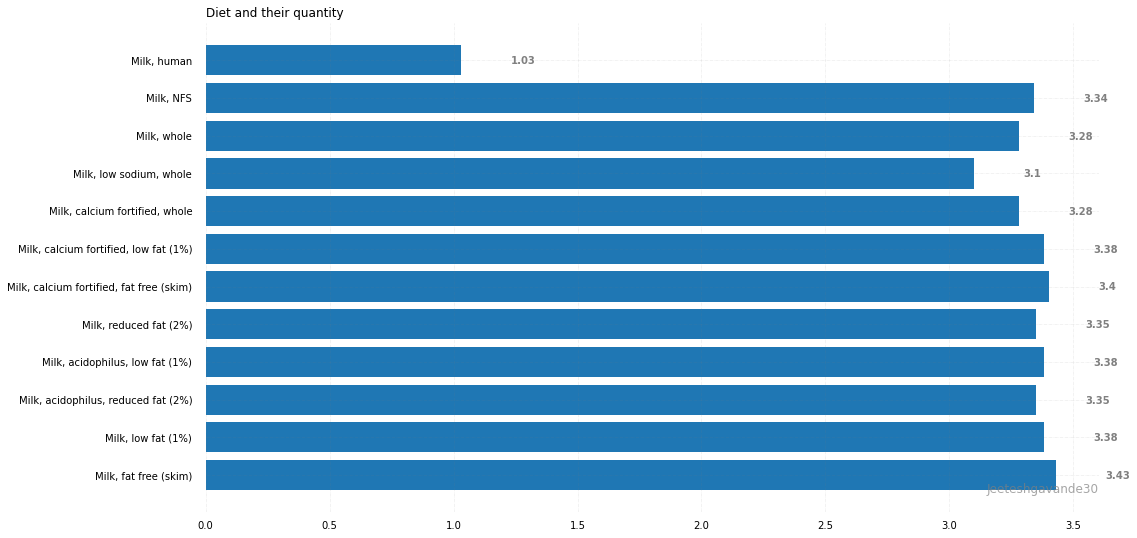

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

# Read CSV into pandas
data = pd.read_csv("/content/drive/MyDrive/PROJECT/DRS/dataset/food_nutrition.csv")
data.head()
df = pd.DataFrame(data)

name = df['Description'].head(12)
price = df['Protein'].head(12)

# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))

# Horizontal Bar Plot
ax.barh(name, price)

# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
	ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 10)

# Add x, y gridlines
ax.grid(b = True, color ='grey',
		linestyle ='-.', linewidth = 0.5,
		alpha = 0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
	plt.text(i.get_width()+0.2, i.get_y()+0.5,
			str(round((i.get_width()), 2)),
			fontsize = 10, fontweight ='bold',
			color ='grey')

# Add Plot Title
ax.set_title('Diet and their quantity',
			loc ='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize = 12,
		color ='grey', ha ='right', va ='bottom',
		alpha = 0.7)

# Show Plot
plt.show()